# Comparaciones, máscaras y lógica booleana

Esta sección cubre el uso de máscaras booleanas para examinar y manipular valores dentro de matrices NumPy.

El enmascaramiento surge cuando desea extraer, modificar, contar o manipular valores en una matriz en función de algún criterio:    por ejemplo, es posible que desee contar todos los valores mayores que cierto valor, o quizás eliminar todos los valores atípicos que están por encima de algún valor umbral. 

En NumPy, el enmascaramiento booleano suele ser la forma más eficiente de realizar este tipo de tareas.

## Ejemplo: Contando los Días de Lluvia 

Imagina que tienes una serie de datos que representan la cantidad de precipitación cada día durante un año en una ciudad determinada. 

Por ejemplo, aquí cargaremos las estadísticas diarias de lluvia para la ciudad de Seattle en 2014.

In [3]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

La matriz contiene 365 valores, que dan la precipitación diaria en pulgadas desde el 1 de enero hasta el 31 de diciembre de 2014. 

Como primera visualización rápida, veamos el histograma de días lluviosos, que se generó usando Matplotlib.

In [5]:
#%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # set plot styles

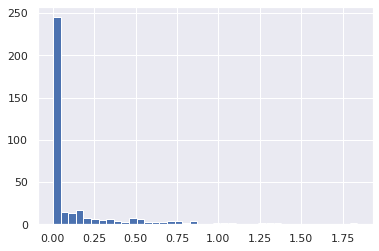

In [6]:
plt.hist(inches, 40);

Este histograma nos da una idea general de cómo se ven los datos: a pesar de su reputación, la gran mayoría de los días en Seattle registraron precipitaciones casi nulas en 2014. Pero esto no hace un buen trabajo al transmitir cierta información que nos gustaría ver: por ejemplo, 
+ ¿Cuántos días lluviosos hubo en el año?
+ ¿Cuál es la precipitación promedio en esos días lluviosos?
+ ¿Cuántos días hubo con más de media pulgada de lluvia?

### Profundizando en los datos 


Un enfoque para esto sería responder estas preguntas a mano: recorrer los datos, incrementando un contador cada vez que vemos valores en algún rango deseado. Por las razones discutidas a lo largo de este capítulo, tal enfoque es muy ineficiente, tanto desde el punto de vista del tiempo de escritura del código como del tiempo de cálculo del resultado. 

Vimos en *"Computación en matrices NumPy: funciones universales"* que las ufuncs de NumPy se pueden usar en lugar de bucles para realizar operaciones aritméticas rápidas de elementos en matrices; De la misma manera, podemos usar otros ufuncs para hacer comparaciones sobre arreglos, y luego podemos manipular los resultados para responder las preguntas que tenemos. Dejaremos los datos a un lado por ahora y discutiremos algunas herramientas generales en NumPy para usar el enmascaramiento para responder rápidamente este tipo de preguntas. 

## Operadores de comparación como ufuncs

Anteriormente, presentamos ufuncs y nos enfocamos en particular en los operadores aritméticos. 

Vimos que usando ``+``, ``-``, ``*``, ``/``, y otros en matrices conducen a operaciones por elementos.

NumPy también implementa operadores de comparación como ``<`` (menor que) y ``>``(mayor que) como elementos ufuncs. El resultado de estos operadores de comparación es siempre una matriz con un tipo de datos booleano. Las seis operaciones de comparación estándar están disponibles:

In [16]:
x = np.array([1, 2, 3, 4, 5])

print(f'x less than 3 {x<3} \n')  # less than
print(f'x greater than 3 {x>3} \n')  # greater than
print(f'x less than or equal 3 {x<=3} \n')  # less than or equal
print(f'x greater than or equal 3 {x>=3} \n')  # greater than or equal
print(f'x equal 3 {x==3} \n')  # equal
print(f'x not equal 3 {x!=3} \n')  # not equal


x less than 3 [ True  True False False False] 

x greater than 3 [False False False  True  True] 

x less than or equal 3 [ True  True  True False False] 

x greater than or equal 3 [False False  True  True  True] 

x equal 3 [False False  True False False] 

x not equal 3 [ True  True False  True  True] 



También es posible hacer una comparación por elementos de dos matrices e incluir expresiones compuestas:

In [18]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Como en el caso de los operadores aritméticos, los operadores de comparación se implementan como ufuncs en NumPy; por ejemplo, cuando escribes ``x < 3``, utiliza internamente NumPy ``np.less(x, 3)``. Aquí se muestra un resumen de los operadores de comparación y su ufunc equivalente: 

    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Al igual que en el caso de los ufuncs aritméticos, estos funcionarán en arreglos de cualquier tamaño y forma. Aquí hay un ejemplo bidimensional:

In [19]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [20]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

En cada caso, el resultado es una matriz booleana y NumPy proporciona una serie de patrones sencillos para trabajar con estos resultados booleanos.

## Trabajando con arreglos booleanos
Dada una matriz booleana, hay una gran cantidad de operaciones útiles que puede realizar. trabajaremos con ``x``, la matriz bidimensional que creamos anteriormente. 

In [21]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Contando entradas

Para contar el número de``True`` entradas en una matriz booleana, ``np.count_nonzero`` es útil: 

In [22]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Vemos que hay ocho entradas de matriz que son menores que 6.

Otra forma de obtener esta información es usar ``np.sum``; en este caso, ``False`` se interpreta como ``0``, y ``True`` se interpreta como ``1``:

In [23]:
np.sum(x < 6)

8

El beneficio de ``sum()`` es que, al igual que con otras funciones de agregación de NumPy, esta suma también se puede realizar a lo largo de filas o columnas:

In [24]:
# Valores x<6 de cada fila
np.sum(x < 6, axis=1)

array([4, 2, 2])

Esto cuenta el número de valores menores a 6 en cada fila de la matriz.

Si estamos interesados ​​en verificar rápidamente si alguno o todos los valores son verdaderos, podemos usar (adivinaste) ``np.any`` or ``np.all``:

In [26]:
# ¿hay valores mayores que 8? 
np.any(x > 8)

True

In [27]:
# ¿hay valores menores que cero? 
np.any(x < 0)

False

In [29]:
# ¿Todos los valores son menores que 10? 
np.all(x < 10)

True

In [28]:
# ¿Todos los valores son iguales a 6? 
np.all(x == 6)

False

``np.all`` and ``np.any`` se puede usar a lo largo de ejes particulares.


In [30]:
# ¿Todos los valores de cada fila son inferiores a 8? 
np.all(x < 8, axis=1)

array([ True, False,  True])

Aquí todos los elementos de la primera y tercera fila son menores que 8, mientras que este no es el caso de la segunda fila. 

Finalmente, una advertencia rápida: como se menciona en Agregaciones: Mín., Máx. y todo lo intermedio, Python tiene incorporadas  funciones``sum()``, ``any()``, y ``all()``. Estos tienen una sintaxis diferente a las versiones de NumPy y, en particular, fallarán o producirán resultados no deseados cuando se usen en arreglos multidimensionales. Asegúrese de que está usando np.sum(), np.any(), y np.all()por estos ejemplos! 

### Operadores booleanos 

Ya hemos visto cómo podríamos contar, digamos, todos los días con menos de cuatro pulgadas de lluvia, o todos los días con más de dos pulgadas de lluvia. Pero, ¿qué pasa si queremos saber todos los días con lluvia de menos de cuatro pulgadas y más de una pulgada? Esto se logra a través de los operadores lógicos bit a bit , ``&``, ``|``, ``^``, and ``~``. Al igual que con los operadores aritméticos estándar, NumPy los sobrecarga como ufuncs que funcionan por elementos en matrices (generalmente booleanas). 

In [31]:
np.sum((inches > 0.5) & (inches < 1))

29

Entonces vemos que hay 29 días con precipitaciones entre 0,5 y 1,0 pulgadas. 

Tenga en cuenta que los paréntesis aquí son importantes: debido a las reglas de precedencia de los operadores, si se eliminan los paréntesis, esta expresión se evaluaría de la siguiente manera, lo que da como resultado un error:

``` python
inches > (0.5 & inches) < 1
```

Usando la equivalencia de *A AND B* y *NOT (NOT A OR NOT B)* (que puede recordar si ha tomado un curso de introducción a la lógica), podemos calcular el mismo resultado de una manera diferente: 

In [32]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

La combinación de operadores de comparación y operadores booleanos en matrices puede conducir a una amplia gama de operaciones lógicas eficientes. 

Con estas herramientas, podríamos comenzar a responder los tipos de preguntas que tenemos sobre nuestros datos meteorológicos. Estos son algunos ejemplos de resultados que podemos calcular al combinar enmascaramiento con agregaciones:

In [33]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Arreglos Booleanos como Máscaras 

En la sección anterior, analizamos los agregados calculados directamente en matrices booleanas. Un patrón más poderoso es usar arreglos booleanos como máscaras, para seleccionar subconjuntos particulares de los datos mismos. Volviendo a nuestra matriz ``x``, supongamos que queremos una matriz de todos los valores en la matriz que son menores que, digamos, 5: 

In [34]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

Podemos obtener fácilmente una matriz booleana para esta condición, como ya hemos visto:

In [35]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Ahora, para *seleccionar* estos valores de la matriz, simplemente podemos indexar en esta matriz booleana; esto se conoce como una enmascaramiento :

In [36]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

Lo que se devuelve es una matriz unidimensional llena de todos los valores que cumplen esta condición; en otras palabras, todos los valores en las posiciones en las que se encuentra la matriz de máscaras.``True``.

Entonces somos libres de operar sobre estos valores como deseemos. 
Podemos calcular algunas estadísticas relevantes sobre nuestros datos de lluvia de Seattle: 

In [39]:
# construye una máscara de todos los días
rainy = (inches > 0)

# construye una máscara de todos los días de verano (el 21 de junio es el día 172)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print(f"Precipitación mediana en días lluviosos en 2014 (pulgadas): {np.median(inches[rainy])}")
print(f"Precipitación mediana en días de verano en 2014 (pulgadas):  {np.median(inches[summer])}")

print(f"Precipitación máxima en días de verano en 2014 (pulgadas): {np.max(inches[summer])}")
print("Precipitación media en días lluviosos que no son de verano (pulgadas): {np.median(inches[rainy & ~summer])}")

Precipitación mediana en días lluviosos en 2014 (pulgadas): 0.19488188976377951
Precipitación mediana en días de verano en 2014 (pulgadas):  0.0
Precipitación máxima en días de verano en 2014 (pulgadas): 0.8503937007874016
Precipitación media en días lluviosos que no son de verano (pulgadas): {np.median(inches[rainy & ~summer])}


Al combinar operaciones booleanas, operaciones de enmascaramiento y agregados, podemos responder rápidamente este tipo de preguntas para nuestro conjunto de datos.

## Aparte: Usando las Palabras Clave *and/or* Contra los Operadores *&/|*


Un punto común de confusión es la diferencia entre las palabras clave ``and`` y ``or`` por un lado, y los operadores ``&`` o ``|`` en la otra mano. ¿Cuándo usarías uno versus el otro? 

La diferencia es esta: ``and`` y ``or`` mide la verdad o la falsedad de todo el objeto , mientras que ``&`` y ``|`` se refieren a bits dentro de cada objeto . 

Cuando usas ``and`` o ``or``, es equivalente a pedirle a Python que trate el objeto como una sola entidad booleana. En Python, todos los enteros distintos de cero se evaluarán como verdaderos. Por lo tanto: 


In [40]:
bool(42), bool(0)

(True, False)

In [54]:
bool(5 and 10)

10

In [55]:
bool(42 or 0)

True

Cuando usas ``&`` y ``|`` en números enteros, la expresión opera sobre los bits del elemento, aplicando el *and* o el *or* a los bits individuales que componen el número:


In [43]:
bin(42)

'0b101010'

In [44]:
bin(59) 

'0b111011'

In [45]:
bin(42 & 59)

'0b101010'

In [46]:
bin(42 | 59)

'0b111011'

Observe que los bits correspondientes de la representación binaria se comparan para obtener el resultado. 

Cuando tiene una matriz de valores booleanos en NumPy, esto se puede considerar como una cadena de bits donde ``1 = True`` y ``0 = False``, y el resultado de ``&`` and ``|`` opera de manera similar a la anterior: 


In [48]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])



Utilizando ``or`` en estas matrices intentará evaluar la verdad o la falsedad de todo el objeto de la matriz, que no es un valor bien definido:


In [49]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()




De manera similar, al hacer una expresión booleana en una matriz dada, debe usar ``|`` o ``&`` en vez de ``or`` o ``and``:

 

In [52]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])



Tratar de evaluar la verdad o la falsedad de toda la matriz dará la misma ``ValueError`` vimos anteriormente:



In [56]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()